Model Interpretability
      - claim = 300 +3(claim) +2(BP      
      - significant variables statistically
 
Refer to all Ho and Ha for hypothesis
    - Durbin-Watson Test
    - Breusch-Pagan Test
    - Shapiro-Wilk Test
    - Jarque-Bera Test

Reduce skewness of the claim variable - log transform, or anything else which helps

log transform of target variable
np.log(x)
predicted(np.log(x)) -> exp() -> y_train,y_test

Dont remove all outliers, instead do a 'Quantile Study'
df['claim'].quantile([0.1,0.2,......,0.95])

High Variance in Train data is overfitting

- ML
    - Regression
    - Classification
        - Binomial
            - Class I (+ve)
            - Class II(-ve)
        - Multinomial


In [43]:
import pandas as pd
import statsmodels.regression.linear_model as ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as Plt

df=pd.read_csv('insurance.csv')

df=df.drop(['bloodpressure','gender','diabetic'], axis=1)

df_cat=df.select_dtypes(include=['object'])
df_num=df.select_dtypes(exclude=['object'])

#N-1 Dummy Encoding
df_cat=pd.get_dummies(df_cat,drop_first=True)

df_merge=pd.concat([df_num,df_cat],axis=1)

#Adding a constant variable
df_merge=sm.add_constant(df_merge)

df_ind=df_merge.drop(['claim'], axis=1)

df_target=df_merge['claim']

x_train,x_test,y_train,y_test=train_test_split(df_target, df_ind, test_size=0.1, random_state=123)
#print(x_train,x_test,y_train,y_test)

model = sm.OLS(x_train,y_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     505.7
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:21:01   Log-Likelihood:                -12190.
No. Observations:                1204   AIC:                         2.440e+04
Df Residuals:                    1196   BIC:                         2.444e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.204e+04   1047.558    -11.492      0.000   -1.41e+04   -9983.409
age                259.5403     12.520     20.730      0.000     234.977     284.104
bmi                338.4505     30.567     11.072      0.000     278.480     398.421
children           473.3447    144.332      3.280      0.001     190.172     756.517
smoker_Yes        2.361e+04    435.113     54.263      0.000    2.28e+04    2.45e+04
region_northwest  -463.9446    500.498     -0.927      0.354   -1445.896     518.007
region_southeast -1081.0480    508.173     -2.127      0.034   -2078.058     -84.039
region_southwest -1032.8288    507.441     -2.035      0.042   -2028.402     -37.256
==============================================================================
Omnibus:                      285.921   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              698.730
Skew:                           1.266   Prob(JB):                    1.87e-152
Kurtosis:                       5.742   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
for x in np.arange(0, 1.1,0.01):
    print(df['claim'].quantile([x]))

0.0    1121.87
Name: claim, dtype: float64
0.01    1252.9761
Name: claim, dtype: float64
0.02    1621.7396
Name: claim, dtype: float64
0.03    1636.1513
Name: claim, dtype: float64
0.04    1709.938
Name: claim, dtype: float64
0.05    1757.7545
Name: claim, dtype: float64
0.06    1907.0574
Name: claim, dtype: float64
0.07    2020.3983
Name: claim, dtype: float64
0.08    2138.0532
Name: claim, dtype: float64
0.09    2208.8319
Name: claim, dtype: float64
0.1    2346.535
Name: claim, dtype: float64
0.11    2484.4596
Name: claim, dtype: float64
0.12    2659.8492
Name: claim, dtype: float64
0.13    2752.5367
Name: claim, dtype: float64
0.14    2905.7964
Name: claim, dtype: float64
0.15    3171.8355
Name: claim, dtype: float64
0.16    3279.6532
Name: claim, dtype: float64
0.17    3474.4434
Name: claim, dtype: float64
0.18    3596.4338
Name: claim, dtype: float64
0.19    3861.3795
Name: claim, dtype: float64
0.2    3991.576
Name: claim, dtype: float64
0.21    4177.2639
Name: claim, dtype: floa

ValueError: percentiles should all be in the interval [0, 1]. Try [0.0101] instead.

In [13]:
max(df['claim'])

63770.43

In [14]:
min(df['claim'])

1121.87

In [21]:
df['claim'].describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: claim, dtype: float64

# ---------------------------------------------------------------------------------------------------------------

In [48]:
df=pd.read_csv('Admission_Predict.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [50]:
df=df.drop(['Serial No.'], axis=1)

In [51]:
df['Research']=df['Research'].astype('object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.1+ KB


array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

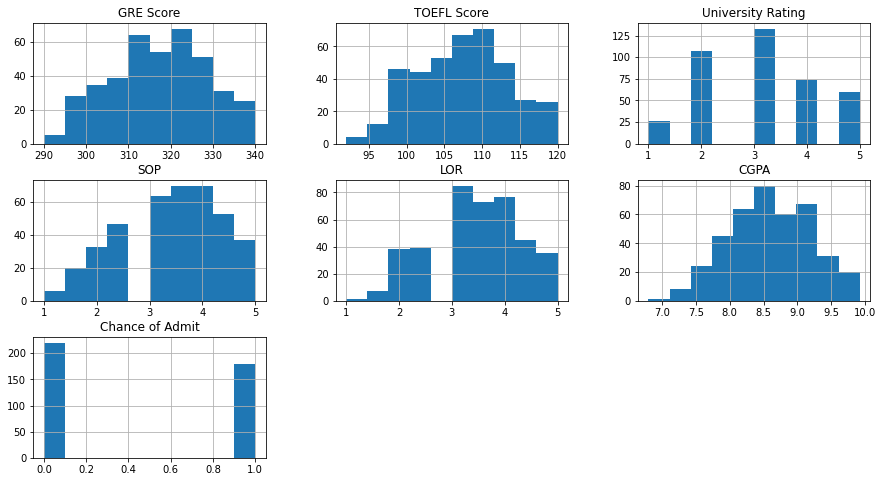

In [53]:
df.hist()

In [54]:
Plt.rcParams['figure.figsize']=[15,8]

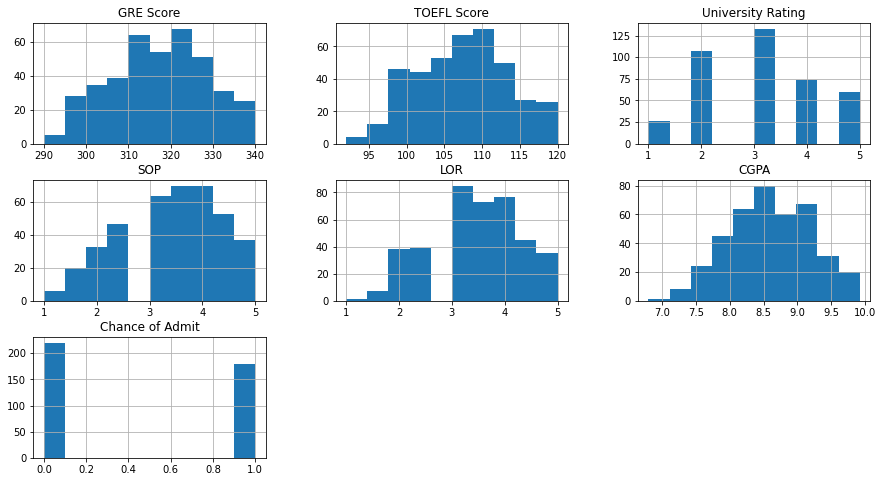

In [57]:
df.hist()
Plt.show()

In [60]:
df['Chance of Admit'].value_counts()

0    220
1    180
Name: Chance of Admit, dtype: int64